In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
%matplotlib inline
import os
import imageio

plt.rcParams['figure.figsize'] = (14, 11)
plt.rcParams['font.size'] = 20
plt.rcParams['image.cmap'] = 'inferno'

In [2]:
def juliaSet(z0, C, n=200, tol_inf=2, tol_0=.2):
    assert isinstance(z0, complex)
    assert isinstance(C, complex)
    
    z_ls = [z0]
    for i in np.arange(n):
        z1 = z_ls[-1] * z_ls[-1] + C
        z_ls.append(z1)
        
        if (np.abs(z_ls[-1]) <= tol_0) | (np.abs(z_ls[-1]) >= tol_inf):
            break
            
    return z_ls, i

def plotEvolJset(z_ls):
    z_re = [z_.real for z_ in z_ls]
    z_im = [z_.imag for z_ in z_ls]
    
    plt.plot(np.arange(len(z_re)), z_re, label='Re(z)')
    plt.plot(np.arange(len(z_im)), z_im, label='Im(z)')
    plt.ylabel('Im(z) / Re(z)')
    plt.legend()
    plt.xlabel('n');

def fractalJsetGreyscale(C, real_space, imag_space, n=200, tol_inf=2, tol_0=.2):
    grid = np.zeros((imag_space.shape[0], real_space.shape[0]))#, 3))
    
    for i, re in enumerate(real_space):
        for j, im in enumerate(imag_space):
            z0 = complex(re, im)
            _, n_fin = juliaSet(z0, C, n, tol_inf, tol_0)
            n_fin = 1 if n_fin > 0 else 0    
            grid[-j, i] = n_fin #/ n * 5
    plt.imshow(grid)
    return grid
    
def fractalJset(C, real_space, imag_space, n=200, tol_inf=2, tol_0=.2):
    grid = np.zeros((imag_space.shape[0], real_space.shape[0]))#, 3))
    
    for i, re in enumerate(real_space):
        for j, im in enumerate(imag_space):
            z0 = complex(re, im)
            _, n_fin = juliaSet(z0, C, n, tol_inf, tol_0)
            grid[-j, i] = n_fin / n * 5
    plt.imshow(grid)
    return grid

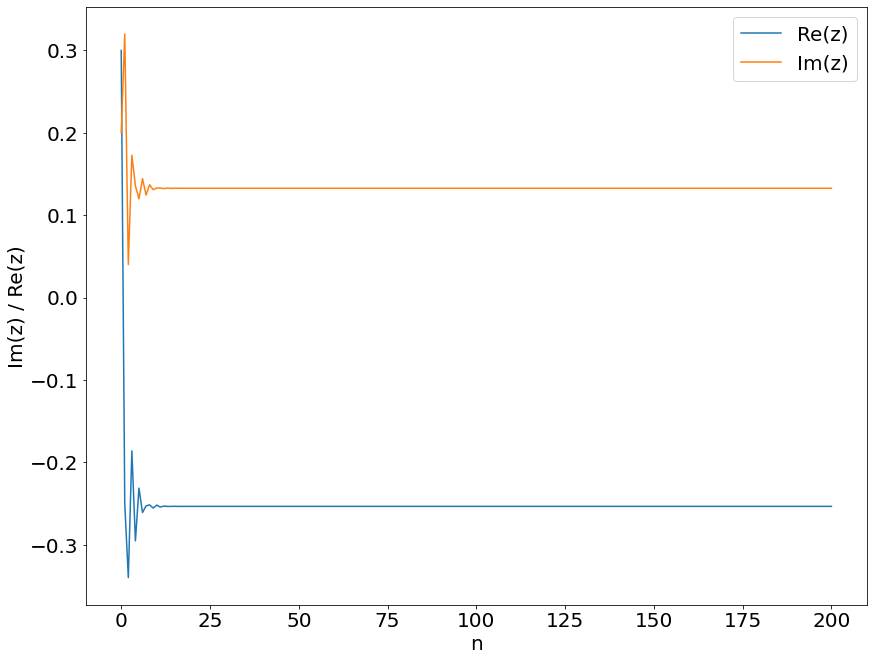

In [3]:
# Plot evolution of imaginary and real parts of a mapping
z_ls, _ = juliaSet(complex(.3, .2), complex(-.3, .2))
plotEvolJset(z_ls)

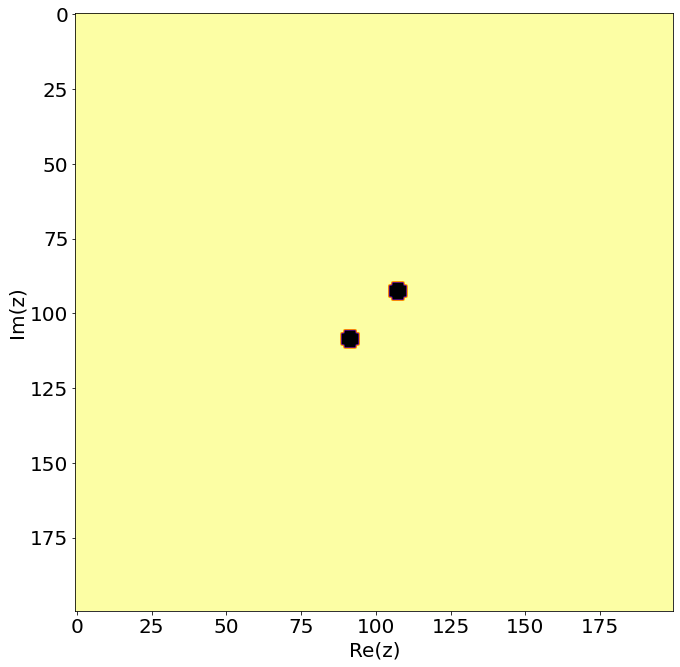

In [4]:
plt.rcParams['figure.figsize'] = (11, 11)
real_space = np.linspace(-1.2, 1.2, 200)
imag_space = np.linspace(-1.2, 1.2, 200)
grid = fractalJsetGreyscale(complex(0., -0.02), real_space, imag_space, n=40, tol_inf=10, tol_0=.01)

# plt.xticks([])
# plt.yticks([]);
plt.xlabel('Re(z)')
plt.ylabel('Im(z)');

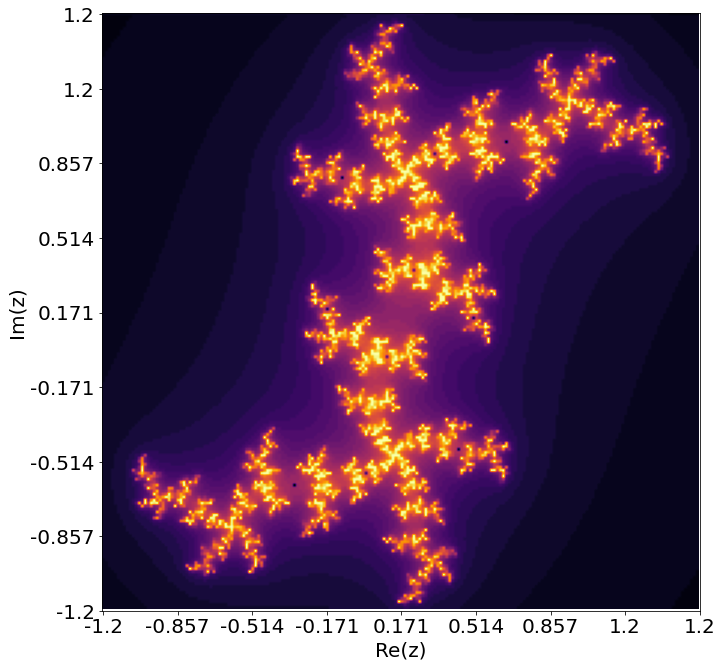

In [5]:
plt.rcParams['figure.figsize'] = (11, 11)

real_space = np.linspace(-1.2, 1.2, 200)
imag_space = np.linspace(-1.2, 1.2, 200)
grid = fractalJset(complex(0.3, -0.6), real_space, imag_space, n=40, tol_inf=10, tol_0=.01)
plt.xticks(ticks=np.arange(0, 201, 25), labels=np.round(np.hstack([np.linspace(-1.2, 1.2, 8), [1.2]]), 3))
plt.yticks(ticks=np.arange(0, 201, 25), labels=np.round(np.flip(np.hstack([np.linspace(-1.2, 1.2, 8), [1.2]])), 3))
plt.xlabel('Re(z)')
plt.ylabel('Im(z)');

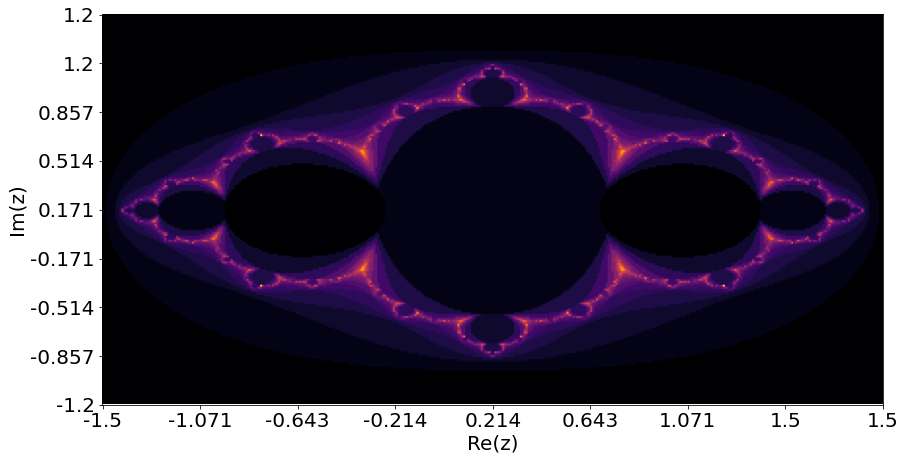

In [156]:
plt.rcParams['figure.figsize'] = (14, 11)

real_space = np.linspace(-1.5, 1.5, 400)
imag_space = np.linspace(-1.2, 1.2, 200)
grid = fractalJset(complex(1-1.618, 0), real_space, imag_space, n=40, tol_inf=1.6, tol_0=.45)
plt.xticks(ticks=np.arange(0, 401, 50), labels=np.round(np.hstack([np.linspace(-1.5, 1.5, 8), [1.5]]), 3))
plt.yticks(ticks=np.arange(0, 201, 25), labels=np.round(np.flip(np.hstack([np.linspace(-1.2, 1.2, 8), [1.2]])), 3))
plt.xlabel('Re(z)')
plt.ylabel('Im(z)');

Text(0.5, 1.0, 'a = 3.142')

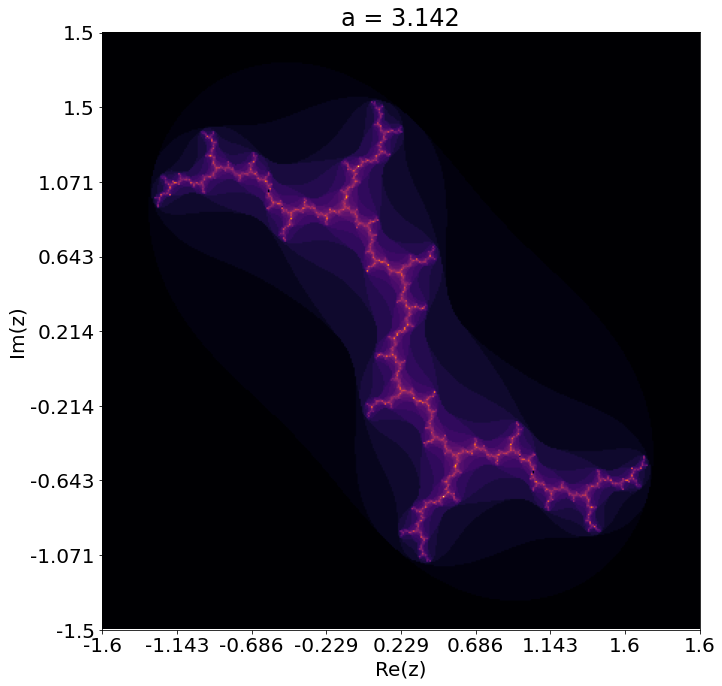

In [210]:
c_i = complex(0, 1)
real_space = np.linspace(-1.6, 1.6, 400)
imag_space = np.linspace(-1.5, 1.5, 400)

grid = fractalJset(c_i, real_space, imag_space, n=40, tol_inf=1.6, tol_0=.01)
plt.xticks(ticks=np.arange(0, 401, 50), labels=np.round(np.hstack([np.linspace(-1.6, 1.6, 8), [1.6]]), 3))
plt.yticks(ticks=np.arange(0, 401, 50), labels=np.round(np.flip(np.hstack([np.linspace(-1.5, 1.5, 8), [1.5]])), 3))
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title(f'a = {np.round(a_i, 3)}');

In [10]:
plt.rcParams['figure.figsize'] = (14, 11)

def c_alpha(a):
    return complex(np.cos(a), np.sin(a))

def makeGif(frame_per_pic=5, alpha_range=np.linspace(0, 2 * np.pi, 20)):
    filenames = []
    for a_i in alpha_range:
        # plot the line chart
        c_i = c_alpha(a_i)
        real_space = np.linspace(-1.6, 1.6, 400)
        imag_space = np.linspace(-1.5, 1.5, 400)

        grid = fractalJset(c_i, real_space, imag_space, n=40, tol_inf=1.6, tol_0=.1)
        plt.xticks(ticks=np.arange(0, 401, 50), labels=np.round(np.hstack([np.linspace(-1.6, 1.6, 8), [1.6]]), 3))
        plt.yticks(ticks=np.arange(0, 401, 50), labels=np.round(np.flip(np.hstack([np.linspace(-1.5, 1.5, 8), [1.5]])), 3))
        plt.xlabel('Re(z)')
        plt.ylabel('Im(z)')
        plt.title(f'a = {np.round(a_i, 3)}')
        
        # create file name and append it to a list
        for j in range(frame_per_pic):
            filename = f'{a_i}_' + str(j) + '.png'
            filenames.append(filename)

            # save frame
            plt.savefig(filename)
        plt.close()

    with imageio.get_writer('check.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Remove files
    for filename in set(filenames):
        os.remove(filename)
    return

In [11]:
s_ = 300
makeGif(frame_per_pic=2, alpha_range=np.linspace(0, 2 * np.pi, s_))